<a href="https://colab.research.google.com/github/Reshmag026/My-Projects/blob/main/Amazon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
dt=pd.read_csv("/content/Amazon Sale Report.csv")

<ipython-input-2-42ab1a6cc165>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  dt=pd.read_csv("/content/Amazon Sale Report.csv")


Shape

In [ ]:
dt.shape

(128975, 24)

Columns

In [ ]:
dt.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

Basic Info

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

Statistical Summary

In [ ]:
dt.describe().style.background_gradient(cmap='Reds',low=0.5,high=1.0,axis=1)

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


Drop Columns

In [ ]:
column_to_drop=["index","Order ID","SKU","ASIN","currency","ship-postal-code","ship-country","promotion-ids","fulfilled-by","Unnamed: 22","Style"]
dt.drop(columns=column_to_drop,axis=1,inplace=True)

Unique Values

In [ ]:
dt.apply(pd.unique)

Date                  [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                    [0, 1, 2, 15, 3, 9, 13, 5, 4, 8]
Amount                [647.62, 406.0, 329.0, 753.33, 574.0, 824.0, 6...
ship-city             [MUMBAI, BENGALURU, NAVI MUMBAI, PUDUCHERRY, C...
ship-state            [MAHARASHTRA, KARNATAKA, PUDUCHERRY, TAMIL NAD...
B2B                                                       [False, True]
dtype: object

In [ ]:
dt.nunique()

Date                    91
Status                  13
Fulfilment               2
Sales Channel            2
ship-service-level       2
Category                 9
Size                    11
Courier Status           3
Qty                     10
Amount                1410
ship-city             8955
ship-state              69
B2B                      2
dtype: int64

Check Null values

In [ ]:
dt.isnull().sum()

Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status        6872
Qty                      0
Amount                7795
ship-city               33
ship-state              33
B2B                      0
dtype: int64

Checking percentage of missing values

In [ ]:
dt.isnull().sum()/len(dt)*100.00,2

(Date                  0.000000
 Status                0.000000
 Fulfilment            0.000000
 Sales Channel         0.000000
 ship-service-level    0.000000
 Category              0.000000
 Size                  0.000000
 Courier Status        5.328164
 Qty                   0.000000
 Amount                6.043807
 ship-city             0.025586
 ship-state            0.025586
 B2B                   0.000000
 dtype: float64,
 2)

Managing null value for Courier Status

In [ ]:
dt['Courier Status'].fillna('unknown',inplace=True)

Managing null value for Ship-city

In [ ]:
dt['ship-city'].mode

<bound method Series.mode of 0              MUMBAI
1           BENGALURU
2         NAVI MUMBAI
3          PUDUCHERRY
4             CHENNAI
             ...     
128970      HYDERABAD
128971       GURUGRAM
128972      HYDERABAD
128973          Halol
128974         Raipur
Name: ship-city, Length: 128975, dtype: object>

In [ ]:
dt['ship-city'].fillna('MUMBAI',inplace=True)

Managing null value for Ship-country

In [ ]:
dt['ship-state'].mode

<bound method Series.mode of 0          MAHARASHTRA
1            KARNATAKA
2          MAHARASHTRA
3           PUDUCHERRY
4           TAMIL NADU
              ...     
128970       TELANGANA
128971         HARYANA
128972       TELANGANA
128973         Gujarat
128974    CHHATTISGARH
Name: ship-state, Length: 128975, dtype: object>

In [ ]:
dt['ship-state'].fillna('MAHARASHTRA',inplace=True)

Managing null value for Amount

In [ ]:
dt[dt['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: Status, dtype: object

In [ ]:
dt['Amount'].fillna(0,inplace=True)

Renaming B2B to Customer type

In [ ]:
mapper={'B2B':'customer_type'}

In [ ]:
dt.rename(columns=mapper, inplace =True)

Converting B2B column values

In [ ]:
dt['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

Converting the format of date column and extracting month

In [ ]:
dt['date'] = pd.to_datetime(dt['Date'])

In [ ]:
dt.drop(columns='Date',axis=1,inplace=True)

In [ ]:
dt['month_name']=dt['date'].dt.month_name()

In [ ]:
dt.isnull().sum()

Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
customer_type         0
date                  0
month_name            0
dtype: int64

Data Visualization

Categorical Distributions

In [ ]:
import numpy as np
from google.colab import autoviz
df_2486591620002136860 = autoviz.get_df('df_2486591620002136860')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2486591620002136860, *['Status'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz
df_2859643879819950609 = autoviz.get_df('df_2859643879819950609')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2859643879819950609, *['Fulfilment'], **{})
chart

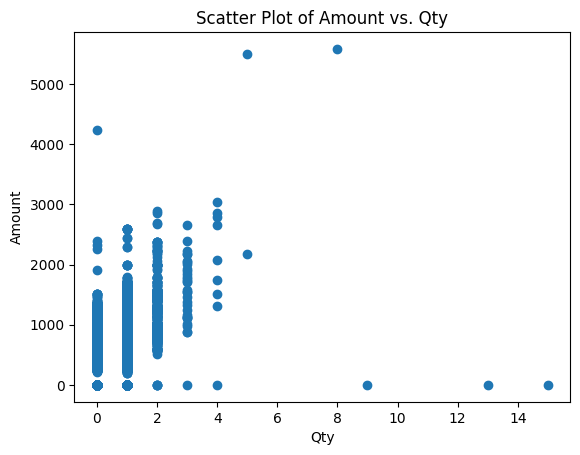

In [ ]:
plt.scatter(dt['Qty'], dt['Amount'])
plt.xlabel('Qty')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount vs. Qty')
plt.show()

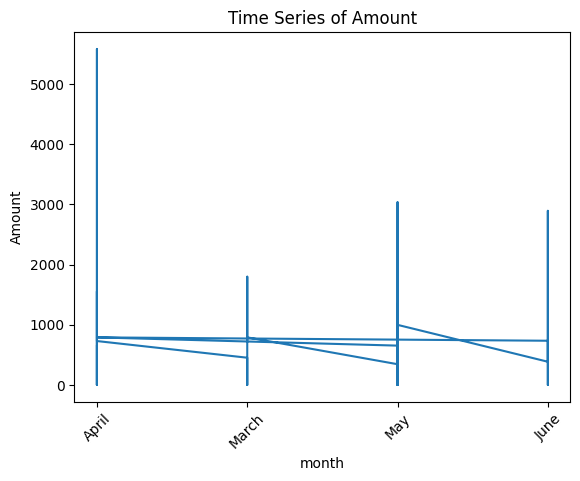

In [ ]:
plt.plot(dt['month_name'], dt['Amount'])
plt.xlabel('month')
plt.ylabel('Amount')
plt.title('Time Series of Amount')
plt.xticks(rotation=45)  # Rotate the x-labels for readability
plt.show()

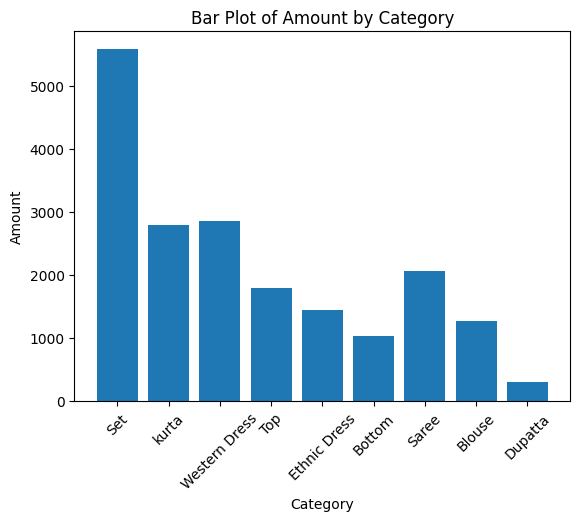

In [ ]:
plt.bar(dt['Category'], dt['Amount'])
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Bar Plot of Amount by Category')
plt.xticks(rotation=45)  # Rotate the x-labels for readability
plt.show()